# Data Analytics On the Web - Assignment 2

# Introduction
This document tries to solve problem related to predicting vehicle collisions in New York based on the weather on a particular day. We are solving this prediction problem using linear regression and DNN (Deep neural network) models. The CSV data prepared as part of Assignment 1 is utilized for this.



# Methodology
This section provides overview of what linear regression and DNN models are and then builds these 2 models for the vehicle collisions and weather data.

**Data for the prediction models**

Before we look into the prediction models, let's look into the data that we are going use.

To train these machine learning models, we will need to feed one set of data and then to test the accuracy/prediction, we will need set of test data.
To achieve this, we have removed few rows randomly from the main file and created as separate file which contains these testing rows. This is done for both linear and DNN data.

Below are the data files we will be using. All these files are hosted on GitHub.


*   Assignment_2_lineardata_train.csv --> This contains training data for linear regression.
*   Assignment_2_lineardata_train.csv --> This contains testing data for linear regression.
*   Assignment_2_dnndata_train.csv --> This contains training data for DNN regression.
*   Assignment_2_dnndata_test.csv --> This contains testing data for DNN regression.

---

**Linear Regression Models**

Linear regression is a data analysis technique that predicts the value of unknown data by using another related and known data value. It mathematically models the unknown or dependent variable and the known or independent variable as a linear equation(AWS).

At its core, a simple linear regression technique attempts to plot a line graph between two data variables, x and y. Here X is called predictor/input and Y is the predicted value/output.

First, we will be importing our training data using pandas library.

Pandas is a Python package providing fast, flexible, and expressive data structures designed to make working with structured (tabular, multidimensional, potentially heterogeneous) and time series data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real world data analysis in Python.

In [ ]:
# Import pandas
import pandas as pd

# create data frame from csv file we hosted on our github
df = pd.read_csv('https://raw.githubusercontent.com/22017498uhi/22017498_DataAnalytics/main/Assignment_2_lineardata_train.csv', index_col=0, )

Below we are verifying that data can be read successfully from here.

In [ ]:
# make sure we have our data by printing it out
print(df[:6])
# print(df) #all

   day  temp  dewp  wdsp  NUM_COLLISIONS
1    1  83.6  63.0   4.1        0.479769
2    3  80.3  54.1   3.8        0.554913
3    4  79.8  56.7   2.9        0.843931
4    5  81.8  65.6   3.6        0.173410
5    6  86.7  64.3   3.8        0.632948
6    7  81.9  62.3   3.1        0.768786


Next step is to import Python module named "NumPy" which helps in performing various mathematical calculations efficiently.

In [ ]:
# needed to help with speedy maths based calculations
import numpy as np


Since our collisions are already normalized, we don't need to define any scale factor here.

Next, we are importing tensor flow and checking its version details. As we can see below, we are running version 2.9.2 of tensor flow.

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.9.2


Now we are preparing a dataframe which contains all required input columns.
By defining columns like this, it becomes easier in future to add or remove any columns for creating new models with different inputs.

In [ ]:
# Create a dataframe with the required inputs from above inported dataframe. 
df_input_data = [df["day"], df["temp"],df["dewp"], df["wdsp"], df["NUM_COLLISIONS"]] 
# create headers for our new dataframe. These should correlate with the above.
df_input_headers = ["day", "temp","dewp", "wdsp", "NUM_COLLISIONS"] 
# create a final dataframe using our new dataframe and headers. 
df_input = pd.concat(df_input_data, axis=1, keys=df_input_headers) 

Next, we are splitting the dataset. 80% of the data will be used for training the model and 20% will be used for validation.

In [ ]:
# split the dataset. 80% for training and 20% for validation.
training_set = df_input.sample(frac=0.8, random_state=0)
test_set = df_input.drop(training_set.index)

Next, we are removing our output column "NUM_COLLISIONS" since this is something model needs to predict, therefore, we won't be passing this into the model as input.

In [ ]:
# copy the datasets and remove the final column, i.e. the output column. We do this using pop.
training_features = training_set.copy()
test_features = test_set.copy()

training_labels = training_features.pop('NUM_COLLISIONS')
test_labels = test_features.pop('NUM_COLLISIONS')

Below we are confirming that output column is removed.

In [ ]:
print(training_features[:6])

      day  temp  dewp  wdsp
2417    3  30.7  14.4   8.1
1776    6  49.5  42.0   7.6
1741    6  41.9  38.5  12.9
1387    1  45.8  36.5  15.4
2673    7  55.9  51.1   6.0
472     4  53.9  47.3   6.3


Next, we are defining the normalization layer. Here we are passing the input columns.

In [ ]:
# boiler plate for this model. You can see that we have used the training_features here for our normalisation layer that we try and fit to the outputs.
normaliser = tf.keras.layers.Normalization(axis=-1)
normaliser.adapt(np.array(training_features))

Below are utilizing Keras API of TensorFlow and using its "Sequential" model for our linear regression.

Keras is a high-level, deep learning API developed by Google for implementing neural networks. It is written in Python and is used to make the implementation of neural networks easy.

Above description says that it is used for building neural networks, but we can use it for our linear regression as well. The way we achieve this is by passing only 1 layer to it. When we define only 1 layer, it becomes a linear regression as there is a direct relation between input and outputs without any middle/hidden layers.

When we define more than 1 layers, it becomes a DNN model. Hence, it's very easy to build both linear and DNN models using Keras API.


In [ ]:
#  we are defining our linear model with one layer and one expected output using keras API.
collisions_linear_model = tf.keras.Sequential([
    normaliser,
    layers.Dense(units=1)
])

Next step is to compile our model. Here we are defining below 2 important things.

**Optimizer**

Here we are using "Adam" optimizer.

Adam (Adaptive Moment Estimation) is an algorithm for optimization technique for gradient descent. The method is efficient when working with large problem involving a lot of data or parameters. It requires less memory and is efficient. Intuitively, it is a combination of the ‘gradient descent with momentum’ algorithm and the ‘RMSP’ algorithm(prakharr0y ).

Here we are passing learning rate of 0.1. This is very critical parameter for training the models. Expectation here is that loss value must decrease as model trains on the data. If loss value fluctuates then it's not a good sign for the model, to overcome this, we can decrease the learning rate (for example 0.01 or 0.001).

**Loss calculation method**

Here we are using "Mean Absolute Error" to calculate the loss. For linear regression this basically calculates, how far the predicated value is from the ideal line/expected value. As model trains on the data, if loss gradually decreases to a lower value, this generally indicates a good model.


In [ ]:
# compile the sequential model, define optimiser and loss parameter.
collisions_linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

Below we are training the model. Here we are passing the input columns data and running it 100 times (epochs).

**epochs**

An epoch in machine learning means one complete pass of the training dataset through the algorithm. This epoch’s number is an important hyperparameter for the algorithm. It specifies the number of epochs or complete passes of the entire training dataset passing through the training or learning process of the algorithm. With each epoch, the dataset’s internal model parameters are updated.

In simple words, it is like a for loop, going through the complete training data 100 times and trying to get better on each iteration (loss decreases).

This is very similar to how humans learn, if we are learning something then the more, we practise, the better we get, the same concept is applied here.

Another thing is we have defined validation_split as 0.2, this means that training data is split further into 80%/20% ratio, basically, during each iteration, model uses this 20% validation data to see how actuate it is and adjusts its parameter to get better during next iterations.

In [ ]:
# now we are going to fit the model where we require the training features and labels. We will run it 100 times i.e. epochs and we have applied a further 20% validation split. 

%%time
history = collisions_linear_model.fit(
    training_features,
    training_labels,
    epochs=100,
    verbose=1,
    validation_split = 0.2)

Epoch 1/100
53/53 [==============================] - 1s 6ms/step - loss: 0.2466 - val_loss: 0.1936
Epoch 2/100
53/53 [==============================] - 0s 3ms/step - loss: 0.1489 - val_loss: 0.1667
Epoch 3/100
53/53 [==============================] - 0s 3ms/step - loss: 0.1496 - val_loss: 0.1730
Epoch 4/100
53/53 [==============================] - 0s 3ms/step - loss: 0.1503 - val_loss: 0.1654
Epoch 5/100
53/53 [==============================] - 0s 3ms/step - loss: 0.1450 - val_loss: 0.1884
Epoch 6/100
53/53 [==============================] - 0s 3ms/step - loss: 0.1515 - val_loss: 0.1603
Epoch 7/100
53/53 [==============================] - 0s 3ms/step - loss: 0.1480 - val_loss: 0.1588
Epoch 8/100
53/53 [==============================] - 0s 3ms/step - loss: 0.1508 - val_loss: 0.1774
Epoch 9/100
53/53 [==============================] - 0s 4ms/step - loss: 0.1503 - val_loss: 0.1664
Epoch 10/100
53/53 [==============================] - 0s 3ms/step - loss: 0.1516 - val_loss: 0.1528
Epoch 11/

Above we can see that loss is fluctuating between 0.14 and 0.15 values.

What if change the learning rate from 0.1 to 0.001.

We are making this change and checking if loss gets any better.

Let's define a new model with the new rate.

In [ ]:
#  we are defining our linear model with one layer and one expected output using keras API.
collisions_linear_model_final = tf.keras.Sequential([
    normaliser,
    layers.Dense(units=1)
])


# compile the sequential model, define optimiser with learning rate 0.001 and loss parameter.
collisions_linear_model_final.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.001),
    loss='mean_absolute_error')

In [ ]:
# now we are going to fit the model where we require the training features and labels. We will run it 100 times i.e. epochs and we have applied a further 20% validation split. 
%%time
history = collisions_linear_model_final.fit(
    training_features,
    training_labels,
    epochs=100,
    verbose=1,
    validation_split = 0.2)

Epoch 1/100
53/53 [==============================] - 1s 5ms/step - loss: 1.1608 - val_loss: 1.1937
Epoch 2/100
53/53 [==============================] - 0s 2ms/step - loss: 1.0780 - val_loss: 1.1190
Epoch 3/100
53/53 [==============================] - 0s 3ms/step - loss: 0.9964 - val_loss: 1.0466
Epoch 4/100
53/53 [==============================] - 0s 2ms/step - loss: 0.9165 - val_loss: 0.9763
Epoch 5/100
53/53 [==============================] - 0s 3ms/step - loss: 0.8382 - val_loss: 0.9076
Epoch 6/100
53/53 [==============================] - 0s 2ms/step - loss: 0.7619 - val_loss: 0.8416
Epoch 7/100
53/53 [==============================] - 0s 2ms/step - loss: 0.6885 - val_loss: 0.7782
Epoch 8/100
53/53 [==============================] - 0s 2ms/step - loss: 0.6193 - val_loss: 0.7187
Epoch 9/100
53/53 [==============================] - 0s 2ms/step - loss: 0.5526 - val_loss: 0.6618
Epoch 10/100
53/53 [==============================] - 0s 3ms/step - loss: 0.4886 - val_loss: 0.6094
Epoch 11/

As we can see above, loss starts from 1.16 and then gradually decreases to 0.13 without fluctuating. This looks better so we are going to use this for predicting data.

Now let's evaluate the model using the 20% validation data we separated earlier.

In [ ]:
mean_absolute_error_linear_final = collisions_linear_model_final.evaluate(
    test_features,
    test_labels, verbose=0)

print(mean_absolute_error_linear_final)

0.15761162340641022


This model will be used to predict the values against test data in **Results** section below.

**DNN Regression**

Next, we are going to prepare the DNN regression model.

Deep learning is the subfield of machine learning which uses a set of neurons organized in layers. A deep learning model consists of three layers: the input layer, the output layer, and the hidden layers.

Like linear model, here also we are going to import DNN training data.

In [ ]:
# create data frame from csv file we hosted on our github
dfDNN = pd.read_csv('https://raw.githubusercontent.com/22017498uhi/22017498_DataAnalytics/main/Assignment_2_dnndata_train.csv', index_col=0)

Next, we are validating if data is imported successfully.

In [ ]:
dfDNN[:5]

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,...,Sat,Sun,Thu,Tue,Wed,year,temp,dewp,wdsp,NUM_COLLISIONS
1,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,2012,83.6,63.0,4.1,0.479769
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,2012,80.3,54.1,3.8,0.554913
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,2012,79.8,56.7,2.9,0.843931
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,2012,81.8,65.6,3.6,0.173410
5,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,2012,86.7,64.3,3.8,0.632948


Next, we are preparing the input columns for the prediction model.

In [ ]:
dnn_input_data = [dfDNN["year"], dfDNN["temp"], dfDNN["dewp"], dfDNN["wdsp"], dfDNN["Sat"], dfDNN["Sun"], dfDNN["Mon"], dfDNN["Tue"], dfDNN["Wed"], dfDNN["Thu"], dfDNN["Fri"], dfDNN["Jan"], dfDNN["Feb"], dfDNN["Mar"], dfDNN["Apr"], dfDNN["May"], dfDNN["Jun"], dfDNN["Jul"], dfDNN["Aug"], dfDNN["Sep"], dfDNN["Oct"], dfDNN["Nov"], dfDNN["Dec"], dfDNN["NUM_COLLISIONS"]]
headers = ["year","temp","dewp" ,"wdsp", "Sat","Sun","Mon","Tue","Wed","Thu","Fri","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec","NUM_COLLISIONS"]
df_dnn_input = pd.concat(dnn_input_data, axis=1, keys=headers)
df_dnn_input.head()

,year,temp,dewp,wdsp,Sat,Sun,Mon,Tue,Wed,Thu,...,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,NUM_COLLISIONS
1,2012,83.6,63.0,4.1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0.479769
2,2012,80.3,54.1,3.8,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0.554913
3,2012,79.8,56.7,2.9,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0.843931
4,2012,81.8,65.6,3.6,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0.173410
5,2012,86.7,64.3,3.8,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0.632948


Next, we are going prepare training and test data set i.e., split them by 80% to 20% ratio.



In [ ]:
training_dataset = df_dnn_input.sample(frac=0.8, random_state=0)
test_dataset = df_dnn_input.drop(training_dataset.index)

Now, we will remove output column from the input data as its not needed for making the predictions.

In [ ]:
training_features = training_dataset.copy()
test_features = test_dataset.copy()

training_labels = training_features.pop('NUM_COLLISIONS')
test_labels = test_features.pop('NUM_COLLISIONS')

Now define the normalizers for the input columns.

In [ ]:
normaliser = tf.keras.layers.Normalization(axis=-1)
normaliser.adapt(np.array(training_features))

Now it's time to define the DNN model. Here are we are passing 2 hidden layers; this is what differentiates this from above linear model.

same as linear, we are going use learning rate of 0.001.

In [ ]:
# we have our normalisation layer (22 inputs), 2 layers of 48, with 1 output.
dnn_model = keras.Sequential([
      normaliser,
      layers.Dense(48, activation='relu'),
      layers.Dense(48, activation='relu'),
      layers.Dense(1)
  ])

dnn_model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

next, we will train the model.

In [ ]:
%%time
history = dnn_model.fit(
    training_features,
    training_labels,
    validation_split=0.2,
    verbose=0, 
    epochs=100)

CPU times: user 16.7 s, sys: 1.02 s, total: 17.7 s
Wall time: 20.7 s


below we are checking the loss value.

In [ ]:
dnn_model_results = dnn_model.evaluate(test_features, test_labels, verbose=0)
print(dnn_model_results)

0.20780299603939056


In below **results** section, we will be predicting collisions with our testing data.

# Results

**Linear Model Prediction**

First, we are going to utilize data from linear test csv file and build dataframe for predicting the collisions and see if its closer to the actual values.

Below is the screenshot from the test data(https://raw.githubusercontent.com/22017498uhi/22017498_DataAnalytics/main/Assignment_2_lineardata_test.csv).

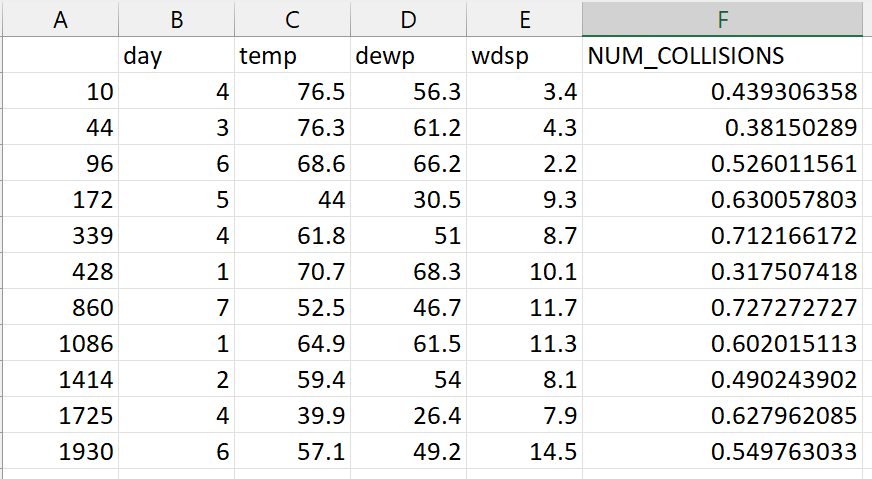


In [ ]:

input_linear = pd.DataFrame.from_dict(data = 
      {
          'day' : [2,4,6],
          'temp' : [59.4,54,8.1],
          'dewp' : [54,26.4,49.2],
          'wdsp' : [8.1,7.9,14.5]
    })

input_linear.head()

,day,temp,dewp,wdsp
0,2,59.4,54.0,8.1
1,4,54.0,26.4,7.9
2,6,8.1,49.2,14.5


Next, we are using the linear model and above test data to make the predictions.

In [ ]:
# next we are checking the predictions.
linear_predictions = collisions_linear_model_final.predict(input_linear[:3])
print(linear_predictions)

1/1 [==============================] - 0s 22ms/step
[[0.44545022]
 [0.43958676]
 [0.8346227 ]]


**DNN Model Prediction**

We are going to utilize actual data prepared for testing this DNN model. This data is hosted here -> https://raw.githubusercontent.com/22017498uhi/22017498_DataAnalytics/main/Assignment_2_dnndata_test.csv

Data looks like below.

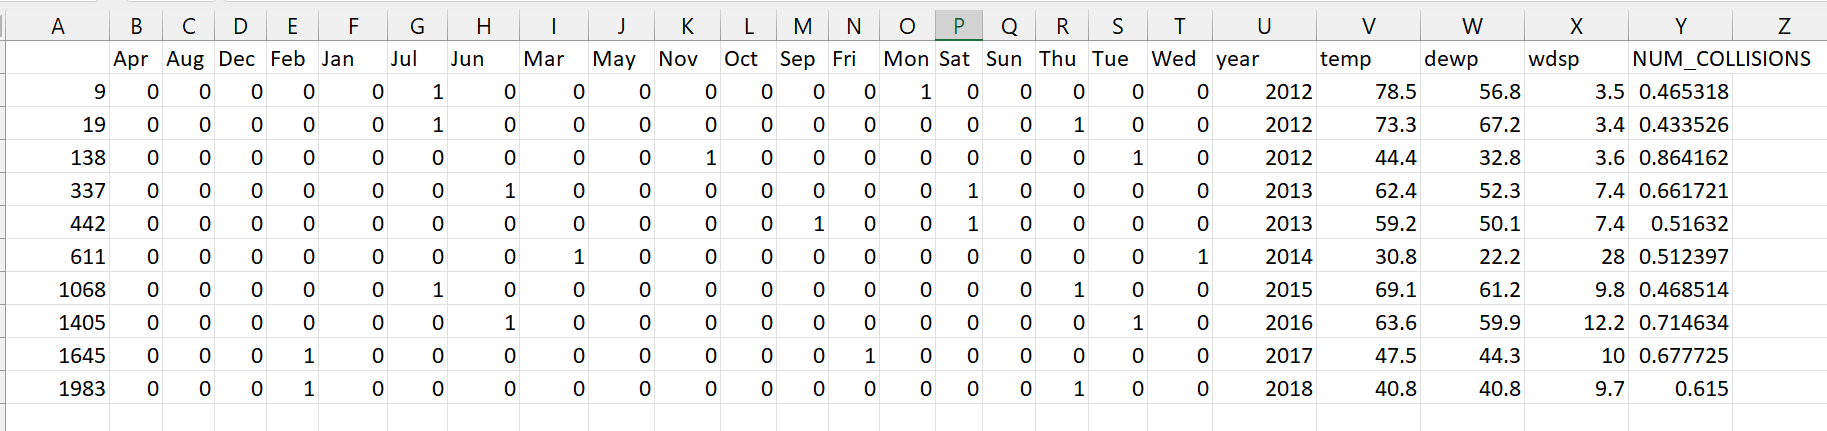

We will use 3 rows from above test data set and make a dataframe for the prediction.

In [ ]:
# make sure the labels match up with the dataframe from earlier.
input_dnn = pd.DataFrame.from_dict(data = 
				{
         'year' : [2012,2012,2013],
         'temp' : [78.5, 73.3, 59.2],
         'dewp' : [56.8, 67.2, 50.1],
         'wdsp' : [3.5, 3.4, 7.4],
         'Sat' : [0,0,1],
         'Sun' : [0,0,0],
         'Mon' : [1,0,0],
         'Tue' : [0,0,0],
         'Wed' : [0,0,0],
         'Thu' : [0,1,0],
         'Fri' : [0,0,0],
         'Jan' : [0,0,0],
         'Feb' : [0,0,0],
         'Mar' : [0,0,0],
         'Apr' : [0,0,0],
         'May' : [0,0,0],
         'Jun' : [0,0,0],
         'Jul' : [1,1,0],
         'Aug' : [0,0,0],
         'Sep' : [0,0,1],
         'Oct' : [0,0,0],
         'Nov' : [0,0,0],
         'Dec' : [0,0,0],
        })

Now we will make the prediction using above DNN model and sample data.

In [ ]:
dnn_predictions = dnn_model.predict(input_dnn[:3])
dnn_predictions 

1/1 [==============================] - 0s 22ms/step


array([[0.45603973],
       [0.53690755],
       [0.5046865 ]], dtype=float32)

Below are the actual and predicted values.

**Actual**  |    **Predicted**

0.46  | 0.45

0.43  | 0.53

0.51  | 0.50     

As we can see above, predicted values are much closed to the actual values.

But this is heavily dependent on the input data. If we pass any row with temp or wdsp having significant lower or higher values, then predicted value does not match the expectation.

# Conclusions

As part of this work, we have built Linear and DNN regression models. It was observed that DNN model seems to make better prediction than linear as it considers month and year into the equation as well.

But both models suffer heavily from outliners or data having large variations in input, this is where both models fail to make accurate predictions.

# References

AWS, , What Is Linear Regression?. Available: https://aws.amazon.com/what-is/linear-regression/ [December 14, 2022].


PRAKHARR0Y, , Intuition of Adam Optimizer. Available: https://www.geeksforgeeks.org/intuition-of-adam-optimizer/ [December 14, 2022].
